Kifiya AI Mastery Training Program 5,6&7 - W0

Solar Data Discovery

Name: Tadele

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the Dataset
df = pd.read_csv("C:/Users/TadeleBizuye/benin-malanville.csv")
# Basic Overview

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
print(df.shape)

(525600, 19)


In [5]:
# Summary Statistics
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [6]:
# Missing Value Report
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)

Comments    525600
dtype: int64

In [7]:
#  Drop or Impute Columns with > 5% Missing
threshold = len(df) * 0.05
df_clean = df.dropna(thresh=threshold, axis=1)

In [8]:
# Impute numeric missing values with median
for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

In [9]:
# Outlier Detection using Z-Score
z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_clean['outlier_flag'] = (np.abs(zscore(df_clean[z_cols])) > 3).any(axis=1)
print("Outliers found:", df_clean['outlier_flag'].sum())

Outliers found: 7740


In [10]:
# remove outliers
df_clean = df_clean[df_clean['outlier_flag'] == False]
df_clean.drop(columns=['outlier_flag'], inplace=True)


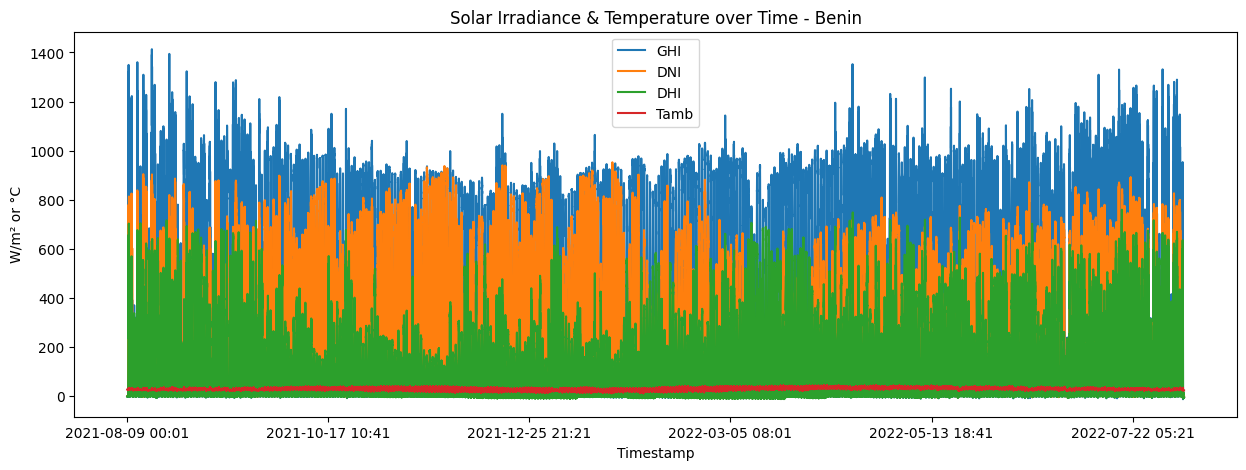

In [11]:
# Time Series Plots
# Plot GHI, DNI, DHI, Tamb
df.set_index("Timestamp")[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,5))
plt.title("Solar Irradiance & Temperature over Time - Benin")
plt.ylabel("W/m² or °C")
plt.xlabel("Timestamp")
plt.show()

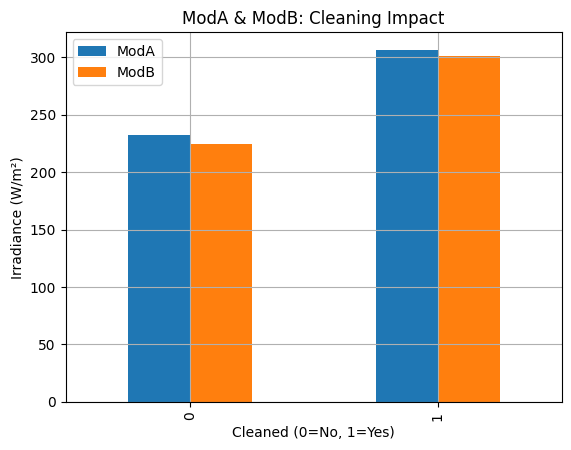

In [12]:
# Cleaning Impact
cleaning_avg = df_clean.groupby("Cleaning")[['ModA', 'ModB']].mean()
cleaning_avg.plot(kind="bar", title="ModA & ModB: Cleaning Impact", ylabel="Irradiance (W/m²)", xlabel="Cleaned (0=No, 1=Yes)")
plt.grid(True)
plt.show()

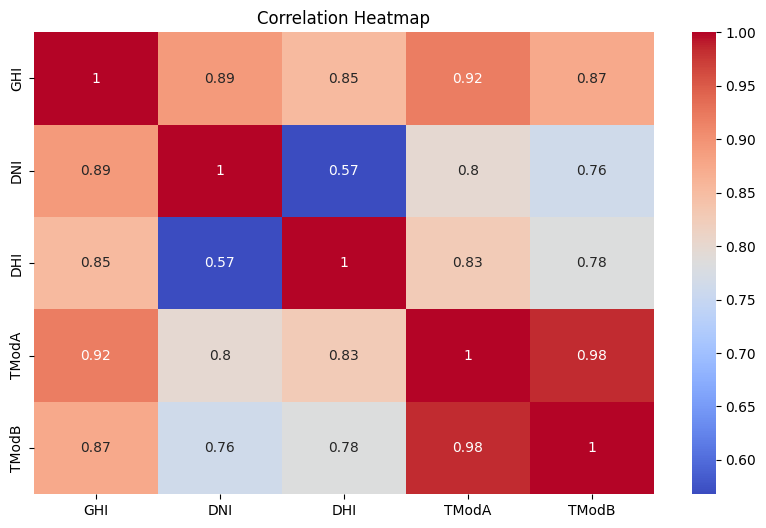

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

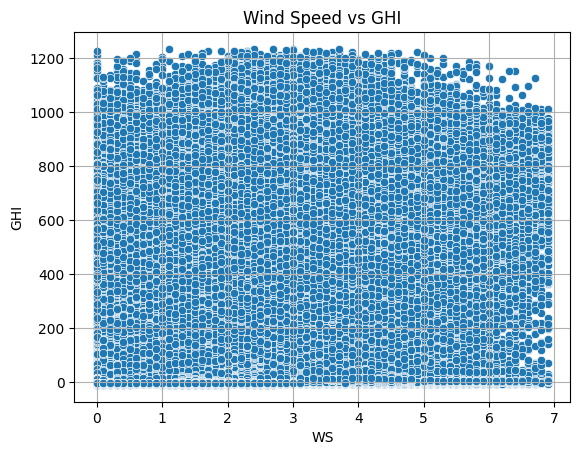

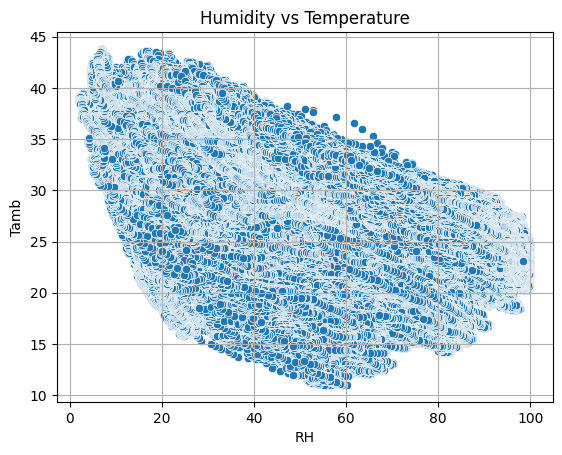

In [14]:
# Scatter Plots
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.grid(True)
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Humidity vs Temperature")
plt.grid(True)
plt.show()

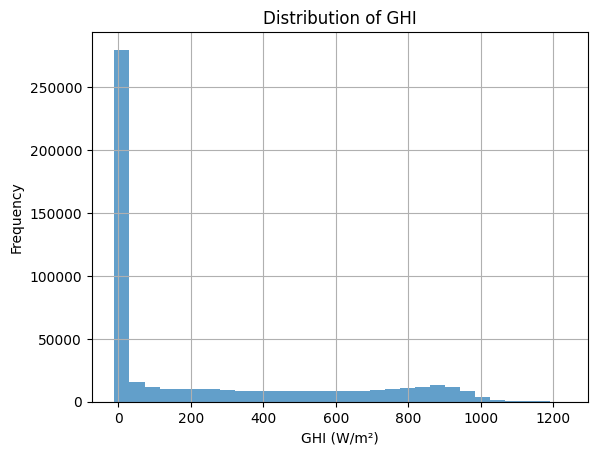

In [15]:
# Histogram & Distribution
df_clean['GHI'].hist(bins=30, alpha=0.7)
plt.title("Distribution of GHI")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

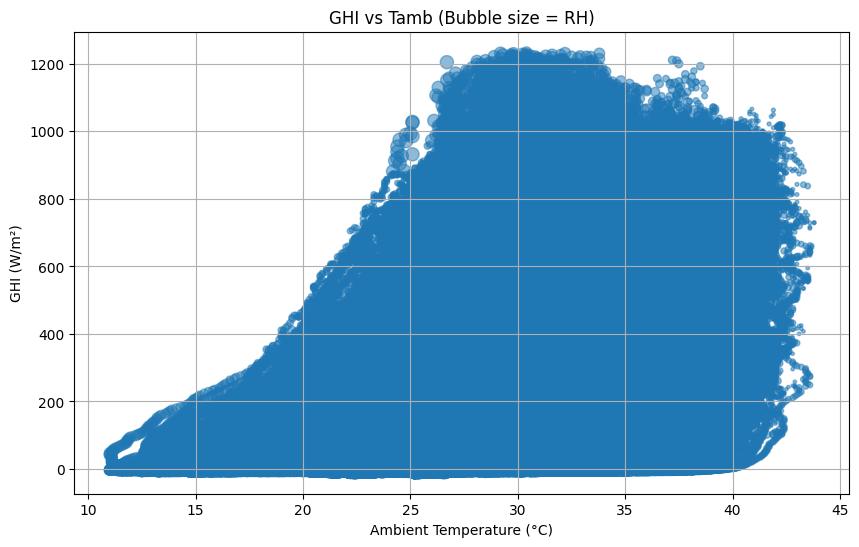

In [16]:
# Bubble Plot
plt.figure(figsize=(10, 6))
bubble = plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.title("GHI vs Tamb (Bubble size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()

In [ ]:
cleaned_df.to_csv('data/cleaned/benin_cleaned.csv', index=False)